In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('./data.csv')

In [35]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [36]:
y = df['group']
X = df.drop(['group', 'Initial_EDSS','Final_EDSS'], axis=1)

In [37]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Dividir los datos escalados
X_train_scaled, X_temp_scaled, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.5, random_state=100)
X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(X_temp_scaled, y_temp, test_size=0.5, random_state=100)

# Definir la grilla de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [39]:
rf = RandomForestClassifier(random_state=100)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir las clases en los conjuntos de entrenamiento, validación y prueba
y_pred_train = best_model.predict(X_train_scaled)
y_pred_val = best_model.predict(X_val_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Calcular la precisión en los conjuntos de entrenamiento, validación y prueba
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)


print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de validación:", accuracy_val)
print("Precisión en el conjunto de prueba:", accuracy_test)

# Calcular las probabilidades de las clases en el conjunto de validación
y_prob_val = best_model.predict_proba(X_val_scaled)[:, 1]


Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de validación: 0.7647058823529411
Precisión en el conjunto de prueba: 0.7681159420289855


AUC-ROC: 0.8596338273757629
AUC-ROC: 0.8596338273757629


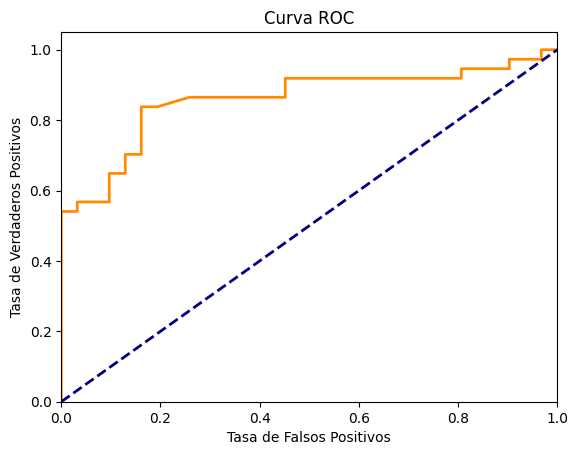

In [44]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_val, y_prob_val)
print("AUC-ROC:", auc_roc)

# Convertir los valores de y_val a {0, 1}
y_val_binary = y_val.apply(lambda x: 0 if x == 1 else 1)

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_val_binary, y_prob_val)
print("AUC-ROC:", auc_roc)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val_binary, y_prob_val)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()